# Table of Contents

# Step 1: Exploratory Data Analysis
## Step 1.1 | Load the Data

In this section we will load the test and training data and take a look at the first few rows of the data and also the data types of the columns.

In [1]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('./BBC News Train.csv')
test_data = pd.read_csv('./BBC News Test.csv')
sample_solution = pd.read_csv('./BBC News Sample Solution.csv')

print(train_data.info())
train_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB
None


,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


In [2]:
print(test_data.info())
test_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  735 non-null    int64 
 1   Text       735 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.6+ KB
None


,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...
...,...,...
730,1923,eu to probe alitalia state aid the european ...
731,373,u2 to play at grammy awards show irish rock ba...
732,1704,sport betting rules in spotlight a group of mp...
733,206,alfa romeos to get gm engines fiat is to sto...


## Step 1.2 | Data Cleaning
In this section we will check for missing values and also check for duplicates in the data. Additionally on the NLP side we will be cleaning the data as well of stop words and lammetizing the data.

In [3]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

print(train_data.duplicated().sum())
print(test_data.duplicated().sum())

ArticleId    0
Text         0
Category     0
dtype: int64
ArticleId    0
Text         0
dtype: int64
0
0


In [4]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

lemmatizer = WordNetLemmatizer()

def clean_text(text):
    tokens = word_tokenize(text.lower())
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stopwords.words('english')]
    return ' '.join(cleaned_tokens)

train_data['cleaned_text'] = train_data['Text'].apply(clean_text)
test_data['cleaned_text'] = test_data['Text'].apply(clean_text)

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1006)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1006)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1006)>


# Step 1.3 | Word Analysis
In this section we will be looking at the most common words in the data, also the most common words in the data and visuzlizing the data.

In [5]:
from collections import Counter
import seaborn as sns

def get_top_words_by_category(df, category_col, text_col, n=10):
    top_words = {}
    categories = df[category_col].unique()
    for category in categories:
        words = ' '.join(df[df[category_col] == category][text_col]).split()
        most_common_words = Counter(words).most_common(n)
        top_words[category] = most_common_words
    return top_words

top_words_per_category = get_top_words_by_category(train_data, 'Category', 'cleaned_text', 10)

for category, words in top_words_per_category.items():
    print(f"Category: {category}")
    print(words)
    print("\n")


Category: business
[('said', 1100), ('year', 574), ('u', 512), ('mr', 394), ('company', 392), ('firm', 374), ('market', 340), ('would', 308), ('also', 279), ('sale', 276)]


Category: tech
[('said', 1064), ('people', 646), ('mobile', 420), ('phone', 394), ('game', 388), ('technology', 380), ('service', 369), ('mr', 350), ('new', 349), ('also', 348)]


Category: politics
[('said', 1445), ('mr', 1099), ('would', 710), ('labour', 488), ('government', 469), ('party', 450), ('election', 448), ('blair', 391), ('people', 372), ('minister', 371)]


Category: sport
[('said', 635), ('game', 481), ('win', 334), ('england', 327), ('first', 323), ('player', 308), ('year', 296), ('world', 266), ('time', 262), ('last', 255)]


Category: entertainment
[('film', 691), ('said', 594), ('best', 404), ('year', 392), ('award', 329), ('also', 277), ('show', 271), ('one', 267), ('u', 262), ('music', 255)]




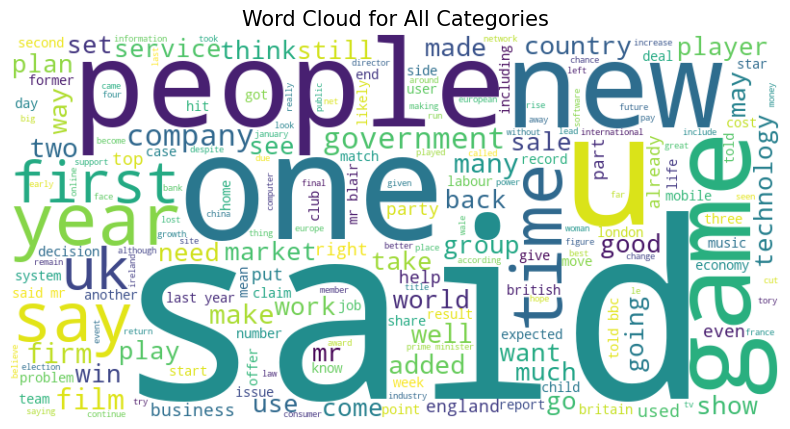

In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=15)
    plt.axis('off')
    plt.show()

all_text = ' '.join(train_data['cleaned_text'])

plot_wordcloud(all_text, 'Word Cloud for All Categories')


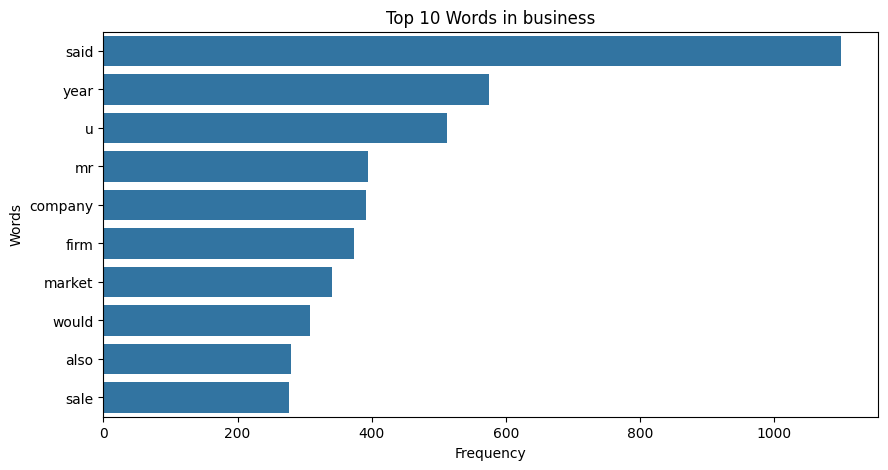

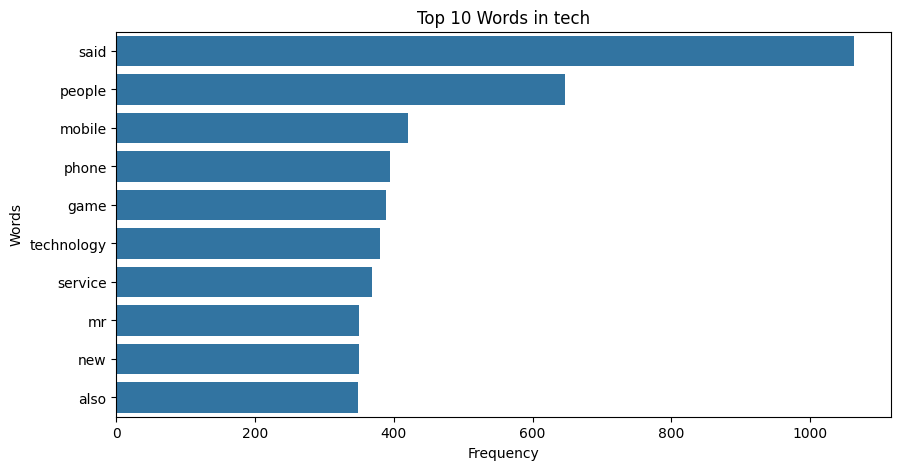

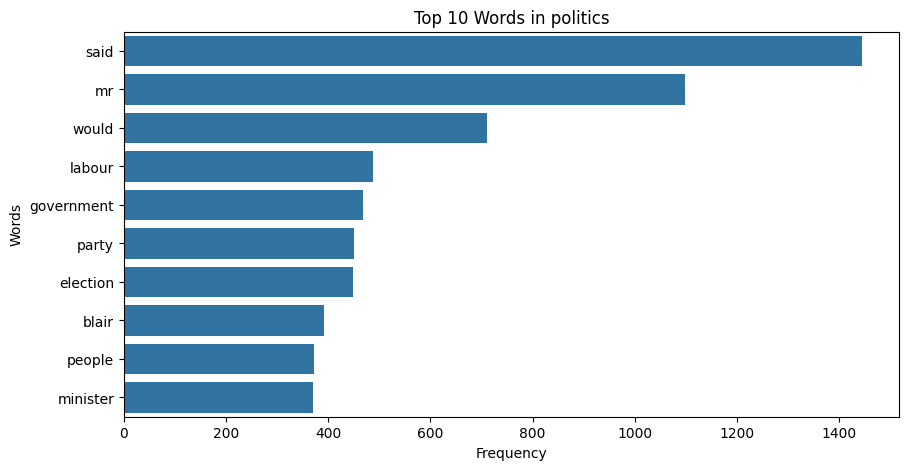

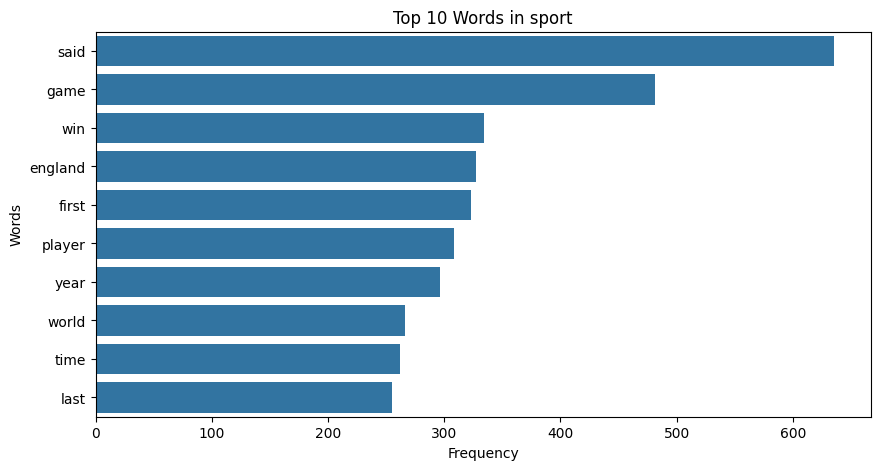

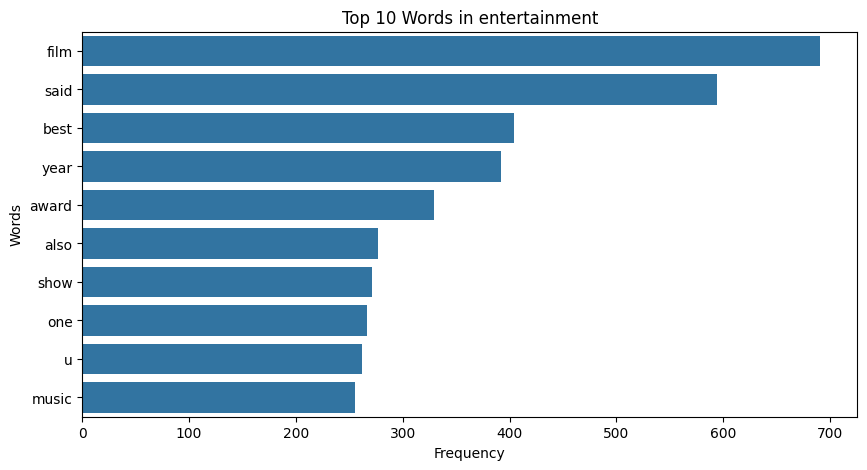

In [7]:
def plot_top_words_bar(top_words, category_name):
    words, counts = zip(*top_words)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f'Top 10 Words in {category_name}')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

for category, words in top_words_per_category.items():
    plot_top_words_bar(words, category)


# Step 1.4 | Data Preprocessing
In this section we will be TF-IDF vectorizing the data and also splitting the data into training and testing data. What is TF-IDF? Term Frequency-Inverse Document Frequency (TF-IDF) is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['cleaned_text'])
X_test_tfidf = tfidf_vectorizer.transform(test_data['cleaned_text'])

print(f'TF-IDF matrix shape for training data: {X_train_tfidf.shape}')
print(f'TF-IDF matrix shape for test data: {X_test_tfidf.shape}')


TF-IDF matrix shape for training data: (1490, 5000)
TF-IDF matrix shape for test data: (735, 5000)


# Step 2 | Modeling
## Step 2.1 | Model Creation
In this section we will be creating a model using the TF-IDF data and also using the NMF model to predict the data.

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression


nmf_model = NMF(n_components=20, random_state=42)
W_train = nmf_model.fit_transform(X_train_tfidf)
W_test = nmf_model.transform(X_test_tfidf)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['Category'])

clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(W_train, y_train)

y_train_pred = clf.predict(W_train)
test_predictions = clf.predict(W_test)

test_data['Category'] = label_encoder.inverse_transform(test_predictions)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


# Step 2.2 | Model Evaluation
In this section we will be evaluating the model using the accuracy score method and also the confusion matrix.

Train Accuracy: 0.9201342281879195


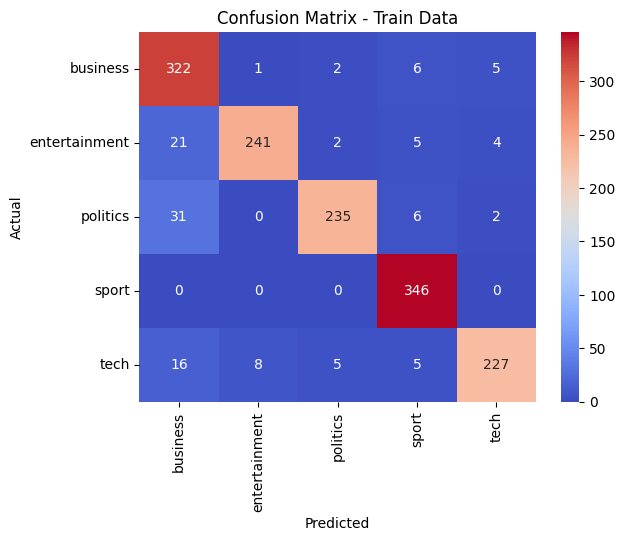

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix

train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train Accuracy: {train_accuracy}")

conf_matrix = confusion_matrix(y_train, y_train_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Train Data')
plt.show()


# Step 2.3 | Model Optimization
In this section we will be change the number of components in our NMF model to see the effect on the accuracy score.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


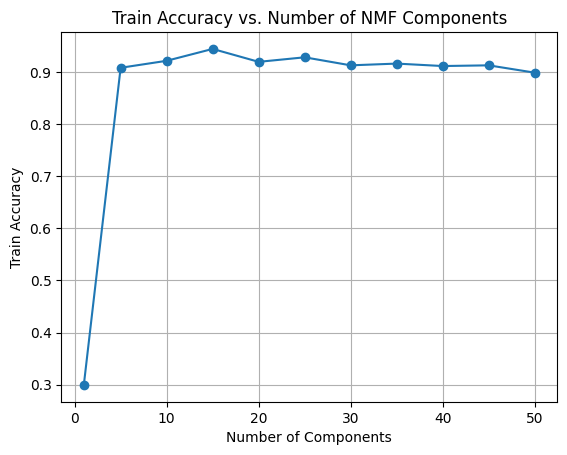

In [19]:
def evaluate_nmf_components(n_components_list):
    results = []
    for n_components in n_components_list:
        nmf_model = NMF(n_components=n_components, random_state=42)
        W_train = nmf_model.fit_transform(X_train_tfidf)
        W_test = nmf_model.transform(X_test_tfidf)
        
        clf = LogisticRegression(max_iter=1000, random_state=42)
        clf.fit(W_train, y_train)
        
        y_train_pred = clf.predict(W_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        results.append((n_components, train_accuracy))
    
    return results

components_list = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
results = evaluate_nmf_components(components_list)

components, accuracies = zip(*results)
plt.plot(components, accuracies, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Train Accuracy')
plt.title('Train Accuracy vs. Number of NMF Components')
plt.grid(True)
plt.show()


# Step 3 | Supervised Learning
We will now compare our previous model (unsupervised learning) to a supervised learning model. We will be using the Logistic Regression model to predict the data.